# Regression কী?
Regression হলো একটি Supervised Machine Learning Technique, যেটা ব্যবহার করা হয় এমন সমস্যায় যেখানে আউটপুটটি একটি সংখ্যাগত (numerical/continuous) মান হয়।

# Simple Linear Regression কী?
এটি সবচেয়ে সহজ রিগ্রেশন টেকনিক যেখানে:

একটি independent variable (X) <br>

একটি dependent variable (Y)<br>
### লক্ষ্য:
X এবং Y এর মধ্যে এমন একটি সরল রেখা (Straight Line) বের করা, যেটা Y-এর মান অনুমান করতে সাহায্য করে।

#### Formula:
Y=mX+b <br>
m = slope (X পরিবর্তনের সাথে Y কত বাড়ছে/কমছে)<br>
b = intercept (যখন X = 0, তখন Y এর মান)

##### এই রেখাটি কিভাবে পাওয়া যায়?
এই রেখাটি এমনভাবে নির্ধারণ করা হয়, যাতে prediction error যত কম হয়। Prediction error বোঝার জন্য আমরা ব্যবহার করি Loss Function।

##### Loss Function কী?
Loss Function হচ্ছে এমন একটি গাণিতিক পদ্ধতি, যা জানায় মডেল কতটা ভুল করছে।
* জনপ্রিয় Loss Functions:

| নাম                           | মানে                                    |
| ----------------------------- | --------------------------------------- |
| **MAE** (Mean Absolute Error) | সব error-এর গড় মান                      |
| **MSE** (Mean Squared Error)  | সব error-এর বর্গের গড়                   |
| **RMSE** (Root MSE)           | MSE-এর বর্গমূল                          |
| **R² Score**                  | মডেল কতটা variance ব্যাখ্যা করতে পেরেছে |

* Evaluation Metrics কীভাবে ব্যবহার হয়?
আমরা Loss Function এবং Evaluation Metrics গুলো ব্যবহার করি:

Training শেষে, মডেল কতটা ভাল কাজ করছে তা বোঝার জন্য

Testing data এর উপরে performance যাচাই করার জন্য

R² Score ও Variance
R² (R-squared) বুঝায় মডেল কতটা ভালোভাবে dependent variable-এর variation ব্যাখ্যা করতে পারে।
R² =1− SSres/SStot

R² মান 1 হলে বোঝায় মডেল একদম perfect,
0 হলে বোঝায় মডেল কোনো কাজে আসছে না।


##### House price predition data set : use just linear regression

In [2]:
# import all necesary library  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read the data from csv file
df  = pd.read_csv('house-price.csv')
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [21]:
# sepaate the features and target variable
x = df['sqft_living'].values.reshape(-1,1)
# using values means convert it into  array

In [22]:
x

array([[1340],
       [3650],
       [1930],
       ...,
       [3010],
       [2090],
       [1490]], shape=(4600, 1))

In [9]:
y = df['price']
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

Text(0, 0.5, 'Price')

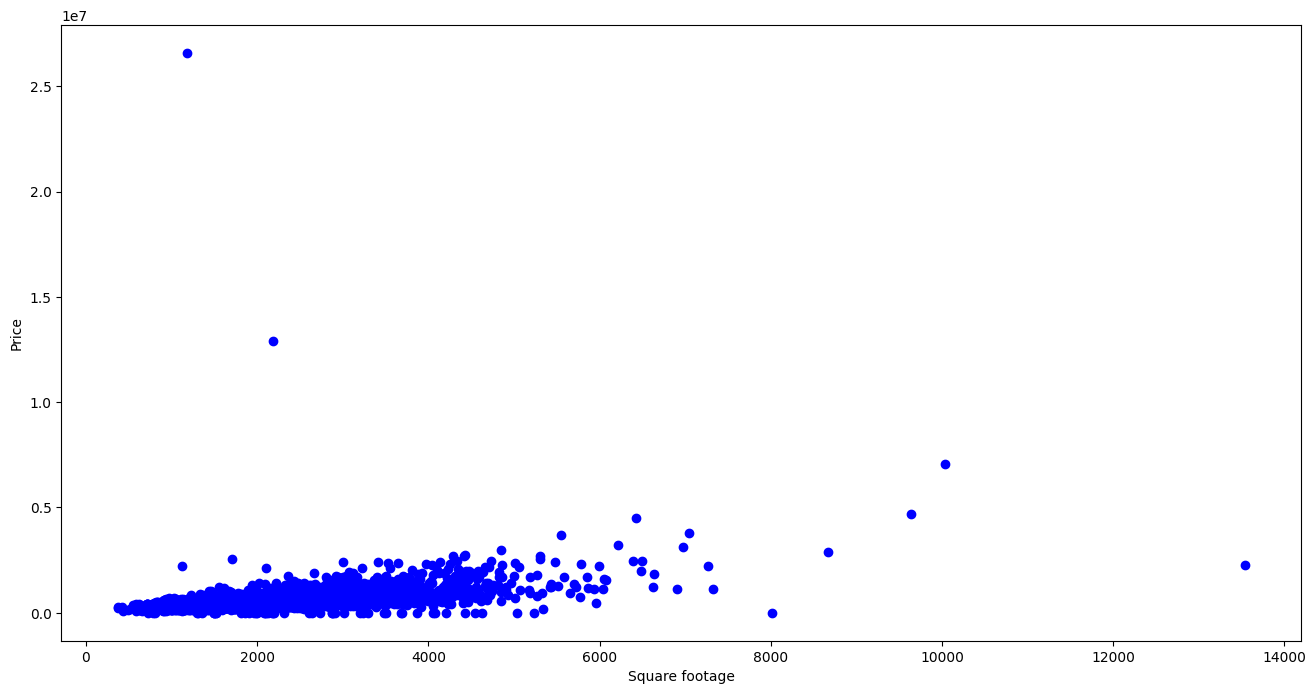

In [ ]:
# now plat a scatter plot to show data diversity
plt.figure(figsize=(16,8))
plt.scatter(x,y,color='blue')
plt.xlabel('Square footage')
plt.ylabel('Price')

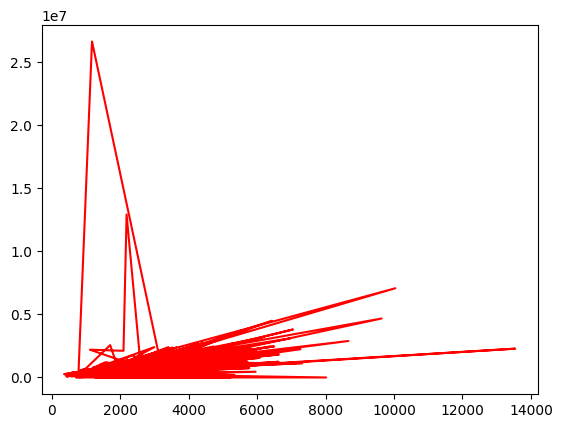

In [25]:
plt.plot(x,y,color='red')

In [26]:
# now use linear regression model to fit the data
from sklearn.linear_model import LinearRegression
# make a object
lr = LinearRegression()
lr

LinearRegression()

In [29]:
# data alada kore train er test data seperate kore nei
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=2)

In [31]:
# check train and test data
X_train.shape

(3680, 1)

In [32]:
X_test.shape

(920, 1)

In [33]:
# now fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
# predit any value
lr.predict(X_test)

array([ 369596.20490097,  396197.30446972,  603685.88110596,
        276492.35641036,  725518.91713082,  430778.73390909,
        593045.44127846,  502601.70274471,  662208.3001572 ,
        308413.67589285,  313733.8958066 ,  348315.32524598,
        356295.6551166 ,  476000.60317597,  385556.86464222,
        795213.79800094,  601025.77114908,  816494.67765594,
        683489.1798122 ,  755312.14864782,  425458.51399535,
        648907.75037283,  260531.69666911,  595705.55123533,
        409497.8542541 ,  590385.33132158,  513242.14257221,
        646247.64041595,  430778.73390909,  875017.09670718,
        268512.02653973,  571764.56162346,  319054.11572035,
        273832.24645348,  308413.67589285,  641193.43149789,
        808514.34778531,  244571.03692786,  694129.6196397 ,
        925559.18588781,  598365.66119221,  521222.47244284,
        287132.79623786,  662208.3001572 ,  888317.64649156,
        890977.75644843,  420404.30507728,  228610.37718661,
        816494.67765594,

##  Students performance dataset: 

* Import important libraris
1. numpy - for numerical calculation
2. pandas - data analysis and visualization
3. matplotlib -  graphycial represntation
4. regression - algorithms
5. traintestsplit - model selection for traiining
6. errros or loss function

In [3]:
# import all librairy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score